<a href="https://colab.research.google.com/github/tcglarry/kg_power_line/blob/master/vsb_power_line_eda_correct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Step 1
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse


E: Package 'python-software-properties' has no installation candidate


In [2]:

# Step 2
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install pyarrow

In [0]:
!sudo chmod 444 'drive/My Drive/kaggle/vsb_power_line/data/train.parquet'

In [0]:
!cp 'drive/My Drive/kaggle/vsb_power_line/data/train.parquet' .

In [0]:
#!ls -l 'drive/My Drive/kaggle/vsb_power_line/data/train.parquet'

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyarrow.parquet as pq
import matplotlib as mpl
mpl.style.use('default')
from PIL import Image
import seaborn as sns
%matplotlib inline

In [0]:
src= 'drive/My Drive/kaggle/vsb_power_line/data/'
src_fig = 'drive/My Drive/kaggle/vsb_power_line/data/signal_to_img/'

In [0]:



def sample(signal, kernel_size):
  sampled = np.zeros((signal.shape[0],  signal.shape[1]//kernel_size))
  print ('sampledshape',sampled.shape)
  for i in range(signal.shape[1]//kernel_size):
    begin = kernel_size * i
    #print (f'begin = {begin}')
    end = min(kernel_size * (i + 1), signal.shape[1])
    #print (f'end = {end}')
    sampled[:,  i] = np.mean(signal[:,  begin:end], axis=1)
    #print (f'from begin {begin } to end {end} mean value {sampled[:, :, i] } selected ')
  return sampled


In [0]:

def signals_to_img(fname,window=100):

  #plt.imshow(FNAME)
  #plt.show()
  img = Image.open(fname).convert('RGB')
  #print (img.size)
  #img = img.resize((750,500))
  x = np.array(img)
  #print (x.shape)

  img.save(fname)


In [0]:

def make_fig(j,sampled):

  length = sampled.shape[0]


  for i in range(length):


    fig = plt.figure(figsize=(8, 4))
    


    plt.xticks([])
    plt.yticks([])
    
    sns.despine(bottom=True, left=True)
    plt.plot(sampled[i, :],color='r')
    #plt.plot(sampled[i*11, :], label='Phase 1')
    #plt.plot(sampled[i*11, :], label='Phase 2')
    #plt.legend()
    fname = src_fig+'test_file_'+str(i+j*454)+'.png'
    plt.savefig(fname, format='png')
    plt.close(fig)
    signals_to_img(fname)
    fig.clf()

    #plt.despine(left=True,bottom=True)
    #plt.show()

In [0]:

#train_df = pq.read_pandas('train.parquet').to_pandas()

for j in range(18):
  
  subset_train = pq.read_pandas('train.parquet', columns=[str(i+j*454) for i in range(454)]).to_pandas()
  subset_value = np.array(subset_train.values).T
  print (subset_value.shape)
  sampled = sample(subset_value,100)
  make_fig(j,sampled)
  print (f'batch {j} /18 ok ')
  
  

(454, 800000)
sampledshape (454, 8000)
batch 0 /18 ok 
(454, 800000)
sampledshape (454, 8000)
batch 1 /18 ok 
(454, 800000)
sampledshape (454, 8000)
batch 2 /18 ok 
(454, 800000)
sampledshape (454, 8000)
batch 3 /18 ok 
(454, 800000)
sampledshape (454, 8000)
batch 4 /18 ok 
(454, 800000)
sampledshape (454, 8000)
batch 5 /18 ok 
(454, 800000)
sampledshape (454, 8000)
batch 6 /18 ok 
(454, 800000)
sampledshape (454, 8000)
batch 7 /18 ok 
(454, 800000)
sampledshape (454, 8000)
batch 8 /18 ok 
(454, 800000)
sampledshape (454, 8000)
batch 9 /18 ok 
(454, 800000)
sampledshape (454, 8000)
batch 10 /18 ok 
(454, 800000)
sampledshape (454, 8000)
batch 11 /18 ok 


In [0]:
#subset_train.head()

No handles with labels found to put in legend.


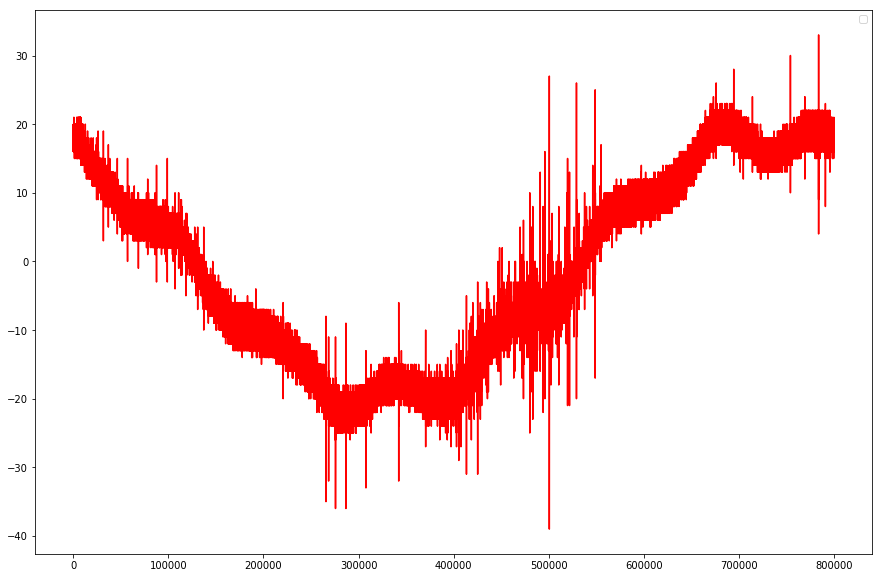

In [0]:
plt.figure(figsize=(15, 10))
plt.plot(subset_value[0, :],color='r')

plt.legend()
plt.show()

In [0]:
def sample(signal, kernel_size):
    sampled = np.zeros((signal.shape[0],  signal.shape[1]//kernel_size))
    print ('sampledshape',sampled.shape)
    for i in range(signal.shape[1]//kernel_size):
        begin = kernel_size * i
        #print (f'begin = {begin}')
        end = min(kernel_size * (i + 1), signal.shape[1])
        #print (f'end = {end}')
        sampled[:,  i] = np.mean(signal[:,  begin:end], axis=1)
        #print (f'from begin {begin } to end {end} mean value {sampled[:, :, i] } selected ')
    return sampled

In [0]:
sampled = sample(subset_value, 100)
print (sampled.shape)

sampledshape (99, 8000)
(99, 8000)


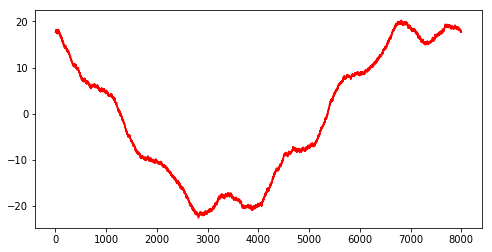

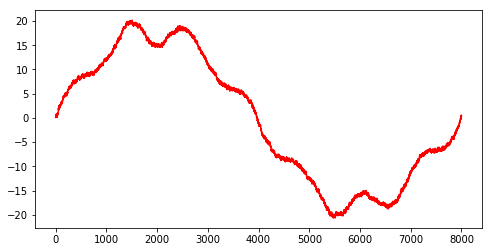

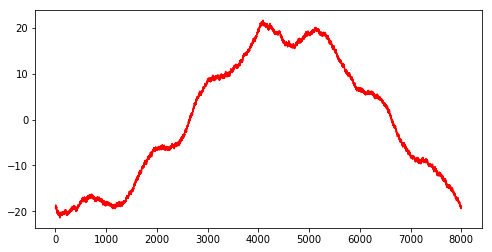

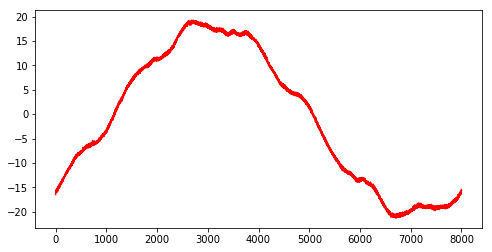

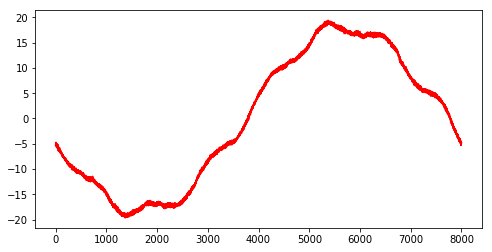

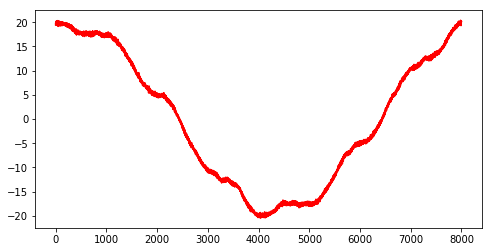

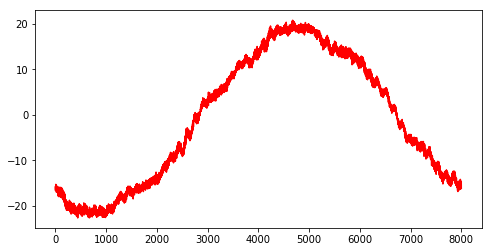

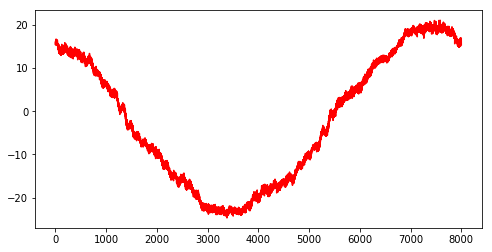

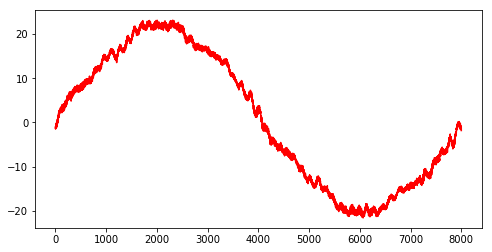

In [0]:


for i in range(9):

  
  fig = plt.figure(figsize=(8, 4))
  sns.despine(bottom=True, left=True)
  plt.plot(sampled[i, :],color='r')
  #plt.plot(sampled[i*11, :], label='Phase 1')
  #plt.plot(sampled[i*11, :], label='Phase 2')
  #plt.legend()
  fname = src_fig+'test_file_'+str(i)+'.png'
  plt.savefig(fname, format='png')
  plt.close(fig)
  signals_to_img(fname)
  
  #plt.despine(left=True,bottom=True)
  #plt.show()

In [0]:
def signals_to_img(fname,window=100):

  #plt.imshow(FNAME)
  #plt.show()
  img = Image.open(fname).convert('RGB')
  #print (img.size)
  #img = img.resize((750,500))
  x = np.array(img)
  #print (x.shape)

  img.save(fname)

In [7]:
signals_to_img('test_file_1.png')

NameError: ignored

In [8]:
im = plt.imread('test_file_1.png')
im.shape

(288, 576, 3)

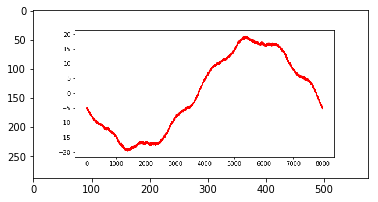

In [12]:
im = plt.imread('test_file_4.png')
plt.imshow(im)

In [0]:
train_csv_df = pd.read_csv(src+'metadata_train.csv')
train_csv_df.head()

,signal_id,id_measurement,phase,target
0,0,0,0,0
1,1,0,1,0
2,2,0,2,0
3,3,1,0,1
4,4,1,1,1


In [0]:
train_csv_df.shape

(8712, 4)

In [0]:
target = train_csv_df['target'][::3]
target.shape

(2904,)

In [0]:
train_csv_df.describe()

,signal_id,id_measurement,phase,target
count,8712.000000,8712.000000,8712.000000,8712.000000
mean,4355.500000,1451.500000,1.000000,0.060262
std,2515.082106,838.360658,0.816543,0.237985
min,0.000000,0.000000,0.000000,0.000000
25%,2177.750000,725.750000,0.000000,0.000000
50%,4355.500000,1451.500000,1.000000,0.000000
75%,6533.250000,2177.250000,2.000000,0.000000
max,8711.000000,2903.000000,2.000000,1.000000


In [0]:
train_csv_df['id_measurement'].value_counts()

2047    3
1130    3
1114    3
1106    3
1098    3
1090    3
1082    3
1074    3
1066    3
1058    3
1050    3
1042    3
1034    3
1026    3
1018    3
1010    3
1002    3
994     3
986     3
978     3
970     3
1122    3
1138    3
1314    3
1146    3
1298    3
1290    3
1282    3
1274    3
1266    3
       ..
397     3
2444    3
389     3
2436    3
381     3
2428    3
373     3
2500    3
453     3
2508    3
501     3
533     3
2580    3
525     3
2572    3
517     3
2564    3
509     3
2556    3
2548    3
461     3
493     3
2540    3
485     3
2532    3
477     3
2524    3
469     3
2516    3
0       3
Name: id_measurement, Length: 2904, dtype: int64